In [2]:
for x in range(10):
    print (x)

0
1
2
3
4
5
6
7
8
9


In [3]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
===== Followig shows 3 Different ways of creating DATAFrame ====

SyntaxError: invalid syntax (<ipython-input-4-b0336464ef76>, line 1)

In [5]:
table = [[1 , 2], [3, 4]]
df = pd.DataFrame(table)
#df = df.transpose()
cols = ['Heading1', 'Heading2']
df.columns = cols
df

,Heading1,Heading2
0,1,2
1,3,4


In [6]:
table = [['Heading1', 'Heading2'], [1 , 2], [3, 4]]
headers = table.pop(0) # gives the headers as list and leaves data

df = pd.DataFrame(table, columns=headers)
df

,Heading1,Heading2
0,1,2
1,3,4


In [7]:
df = pd.DataFrame()

df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

In [8]:
df.head()

,x,y
0,51,49
1,8,57
2,66,27
3,93,62
4,82,77


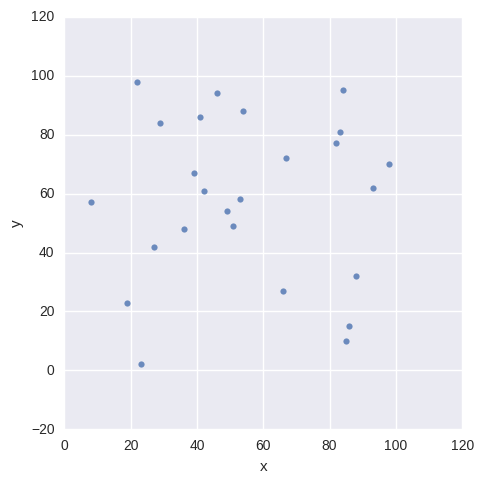

In [9]:
sns.lmplot('x', 'y', data=df, fit_reg=False)

In [14]:
# source : http://stackoverflow.com/questions/27873190/creating-new-pandas-dataframe-from-existing-dataframe-and-index
df = pd.DataFrame({'a': {'A': 1, 'B': 0}, 'b': {'A': 0, 'B': 1}})
arr = ["A", "B", "C"]
print(df)
df.loc[arr]
df

   a  b
A  1  0
B  0  1


,a,b
A,1,0
B,0,1


In [13]:
df2 = df.filter(['A','B'], axis=1)
df2

""
A
B
